x1    181.953210
x2     38.046709
dtype: float64


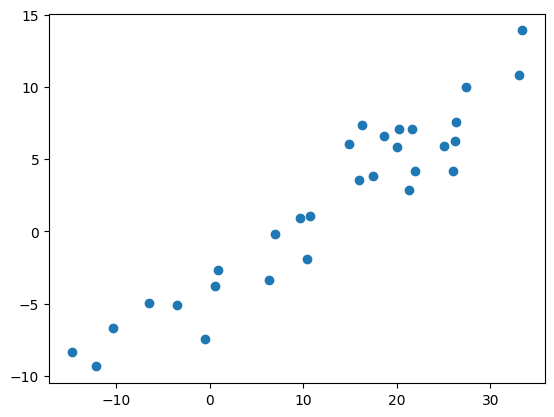

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv('/content/data.csv')

plt.scatter(df["x1"],df["x2"])

print(df.var())

Es preferible varialbes con mas varianza porque dan mas informacion, para hacer un arbol y una mejor prediccion

In [ ]:
pca = PCA()
pca.fit(df)


PCA()

Pca pone la varianza en la primera variable en un nuevo sistema de variables, por esto se puede trabajar con una sola columna, por lo tanto, se puede reducir la dimensionalidad.

In [ ]:
dfII = pca.transform(df)
dfII

array([[ 27.39951336,  -0.36985267],
       [ -4.93699511,  -0.24036895],
       [  3.34630943,   0.23507097],
       [ 24.67589289,   1.31005673],
       [ 12.75556411,   0.49169995],
       [  2.24409512,  -0.05369389],
       [-13.99198166,  -1.5862048 ],
       [-14.63043327,  -0.39344108],
       [ -9.25531322,  -1.72239748],
       [  6.18189235,   0.30733544],
       [ -7.14316789,   1.85947455],
       [ -8.11971693,  -2.71415966],
       [-12.9310283 ,  -3.40243611],
       [  8.06407767,  -2.38886093],
       [ -5.37216518,   3.43586745],
       [ 29.39730664,   1.63273178],
       [ -8.12494499,   0.5607085 ],
       [-23.66010341,   2.53191376],
       [ -8.84473609,   1.59522141],
       [ 20.46247855,   1.40316611],
       [ -3.52409178,   0.1155319 ],
       [ 16.00639078,  -3.33494533],
       [-16.60028397,   1.37477005],
       [-10.12545448,   1.03933814],
       [-12.78552244,  -1.4177613 ],
       [  3.8115351 ,  -2.61252346],
       [ 17.75741712,   0.042386  ],
 

In [ ]:
#Se le coloca axis para indicarle al metodo que la varianza se saca por columna

print(dfII.var(axis = 0, ddof=1))

[209.57254397   3.09404489]


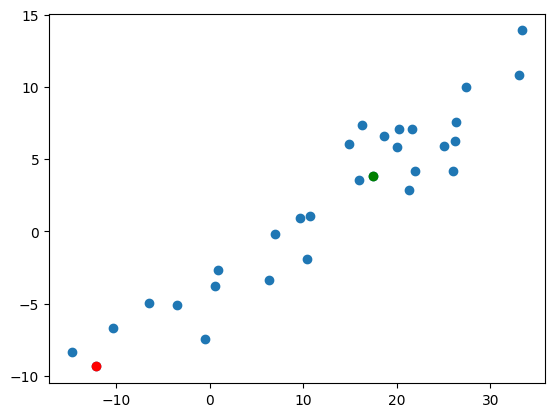

In [ ]:
#COMPARACION Y RASTREO DEL PUNTO

plt.scatter(df["x1"],df["x2"])
plt.scatter(df["x1"][0],df["x2"][0], color='red')
plt.scatter(df["x1"][1],df["x2"][1], color='green')

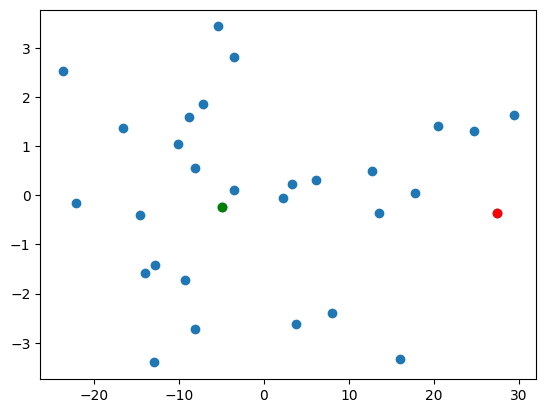

In [ ]:
#Se le coloca esta notacion porque es numpy seginifia todas las filas contra columna 0

plt.scatter(dfII[:,0],dfII[:,1])
plt.scatter(dfII[:,0][0],dfII[:,1][0], color='red')
plt.scatter(dfII[:,0][1],dfII[:,1][1], color='green')

In [ ]:
#Para sacar la proporcion de la varianza de una variable en el set de datos se realiza el siguiente calculo varianza1 / suma de todas las varianzas

Varx1trans = 209.57254397 / (209.57254397 + 3.09404489)
Varx2trans = 100 - (Varx1trans*100)

print(Varx1trans)
print(Varx2trans)

0.9854511942539463
1.4548805746053688


In [ ]:
#Pca utiliza n-1 (para muestral) por eso, para controlar cual se utiliza se usa un parametro que se llama grados de libertad (ddof) default = 0 (n - poblacional)
pca.explained_variance_

array([216.79918342,   3.20073609])

In [ ]:
pca.explained_variance_ratio_

array([0.98545119, 0.01454881])

Cuando se quitan las variables se mejora el desempeño del algoritmo (albol) para se dificulta la interpretacion

tAREA: Con california escalar con standart (porque tiene outliers y los datos grandes se llevan a los pequeños) y luego quitar las variables con menos peso dentro del pca

In [ ]:
#Tarea

df = pd.read_csv('/content/housing.csv')
df = df.drop('ocean_proximity', axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
# prompt: Cuando se encuentre un Nan en df quiero que se reemplace por la mediana de la columna en donde esta el dato Nan

df = df.fillna(df.median())


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

model = StandardScaler()
dfII = model.fit_transform(df)

In [ ]:
dfIII = pd.DataFrame(dfII, columns=df.columns)
dfIII

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418
...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316


In [ ]:
pca = PCA()
pca.fit(dfIII)

PCA()

In [ ]:
pca.explained_variance_

array([3.91308776, 1.92241961, 1.69721494, 0.91019995, 0.29304805,
       0.1428018 , 0.06238836, 0.04448747, 0.01479255])

In [ ]:
pca.explained_variance_ratio_

array([0.43476625, 0.21359172, 0.18857021, 0.10112838, 0.0325593 ,
       0.01586609, 0.0069317 , 0.00494281, 0.00164354])